In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [48]:
df = pd.read_csv("churn.csv")
df.head(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [49]:
df.shape

(10000, 14)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [51]:
df.drop(columns=["RowNumber","CustomerId","Surname","Age"], axis=1, inplace=True)
df.head(3)

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,8,159660.80,3,1,0,113931.57,1


In [52]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [53]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [54]:
final_df = pd.get_dummies(df, columns=["Geography","Gender"], drop_first=True, dtype=int)
final_df.head(6)

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,8,113755.78,2,1,0,149756.71,1,0,1,1


In [55]:
X = final_df.drop(columns = ["Exited"])
y = final_df.Exited

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [57]:
X_train.shape

(7500, 10)

In [58]:
ss = StandardScaler()
x_train_trans = ss.fit_transform(X_train)
x_test_trans = ss.transform(X_test)

In [59]:
x_train_trans

array([[-0.60390003,  1.37625225,  0.88975445, ..., -0.57981364,
        -0.5818665 ,  0.91826179],
       [ 0.04473598,  0.68299603,  0.36900201, ..., -0.57981364,
        -0.5818665 ,  0.91826179],
       [ 0.30213122,  0.33636792,  0.62031555, ..., -0.57981364,
        -0.5818665 , -1.08901406],
       ...,
       [ 0.50804742, -0.70351641,  0.55719841, ...,  1.72469209,
        -0.5818665 , -1.08901406],
       [-2.2615254 , -0.01026019, -1.22137689, ..., -0.57981364,
        -0.5818665 ,  0.91826179],
       [-0.78922461, -1.74340074,  1.33096992, ..., -0.57981364,
         1.71860727,  0.91826179]])

In [60]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [65]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=10))
model.add(Dense(8, activation='relu'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 11)                121       
                                                                 
 dense_17 (Dense)            (None, 8)                 96        
                                                                 
 dense_18 (Dense)            (None, 5)                 45        
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 268
Trainable params: 268
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])

In [68]:
result = model.fit(x_train_trans, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
165/165 [==============================] - 1s 2ms/step - loss: 0.7253 - accuracy: 0.4318 - val_loss: 0.6079 - val_accuracy: 0.7996
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7890 - val_loss: 0.5165 - val_accuracy: 0.7996
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7890 - val_loss: 0.4970 - val_accuracy: 0.7996
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7890 - val_loss: 0.4879 - val_accuracy: 0.7996
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7890 - val_loss: 0.4787 - val_accuracy: 0.7996
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7890 - val_loss: 0.4698 - val_accuracy: 0.7996
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7890 - val_loss: 0.4656 - val_accuracy: 0.7996

In [69]:
y_log = model.predict(x_test_trans)
y_pred = np.where(y_log<0.5, 0, 1)
accuracy_score(y_test, y_pred)

79/79 [==============================] - 0s 938us/step


0.8312

In [70]:
result

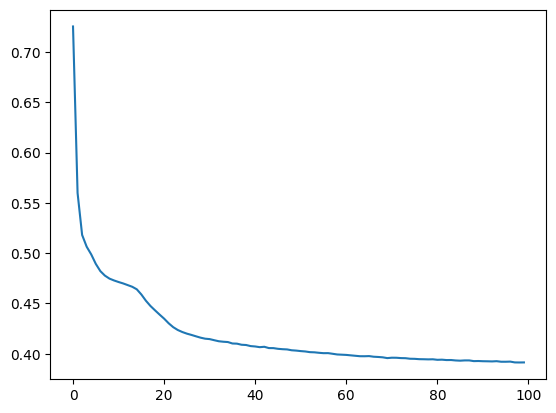

In [71]:
plt.plot(result.history['loss'])

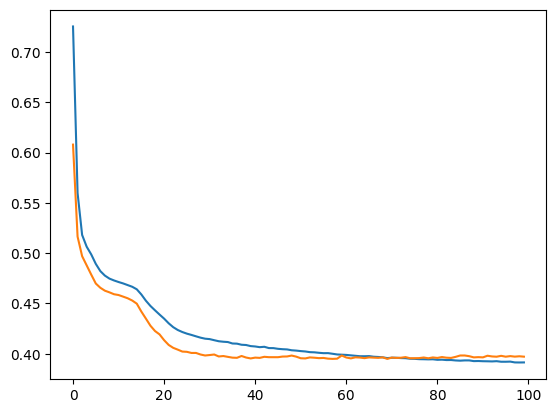

In [72]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

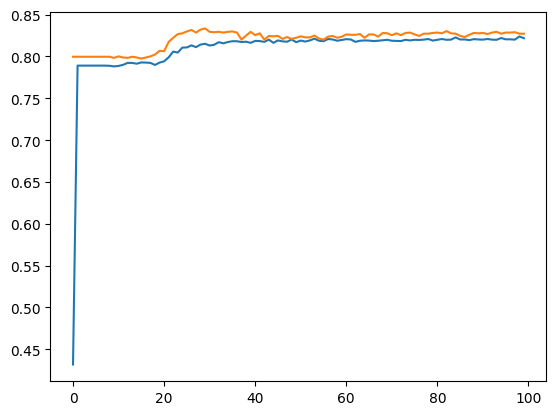

In [73]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])